<a href="https://colab.research.google.com/github/onleey/Machine-Learning_demo/blob/master/607_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%ED%9A%8C%EA%B7%80%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/001'

Mounted at /content/drive
/content/drive/MyDrive/001


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn import datasets
#from sklearn.datasets import load_boston
boston = datasets.fetch_openml('boston')
print(type(boston))
print(dir(boston))

bostonDF = pd.DataFrame(boston.data, columns= boston.feature_names)
print(bostonDF.head(5))

bostonDF['PRICE'] = boston.target
print(bostonDF.head(2))

<class 'sklearn.utils._bunch.Bunch'>
['DESCR', 'categories', 'data', 'details', 'feature_names', 'frame', 'target', 'target_names', 'url']
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   

       B  LSTAT  PRICE  


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [17]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [18]:
#CHAS, RAD의 데이터 타입변환
bostonDF['CHAS'] = bostonDF['CHAS'].astype('int')
bostonDF['RAD'] = bostonDF['RAD'].astype('int')
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

각 컬럼별로 주택가격에 미치는 영향도를 조사

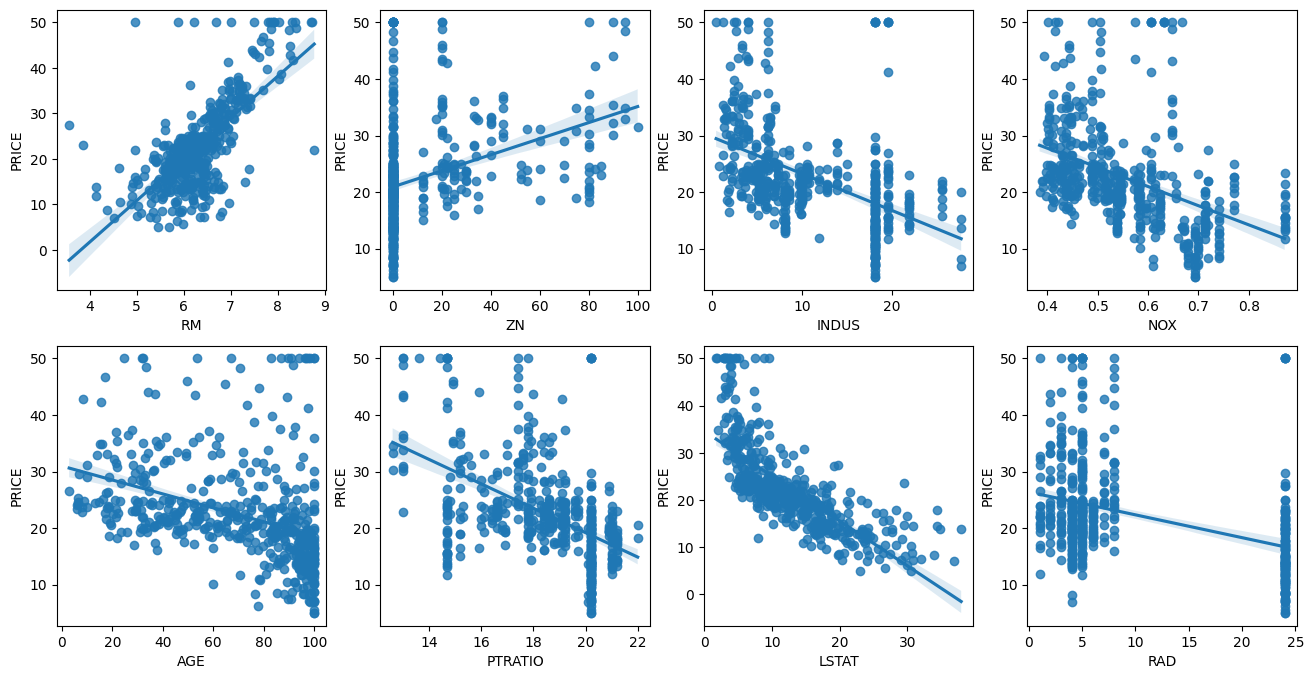

In [21]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4*2의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
Im_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(Im_features):
  row = int(i/4)
  col = i%4
  #seaborn의 regplot을 이용해 산점도와 선형회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  #LinearRegression (회귀) LogisticsRegression(분류)
from sklearn.metrics import mean_squared_error, r2_score

#train과 test를 70:30으로 나눔
X_train, X_test, y_train, y_test = train_test_split(bostonDF.iloc[:,:-1], bostonDF.iloc[:,-1], test_size=0.3, random_state=46)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

#np.sum(y_preds == y_test)/len(y_test)

mse= mean_squared_error(y_test, y_preds)
print('MSE:{0:.3f}'.format(mse) )

#r2_score()의 결과는 0부터 1까지 나올 수 있으며 1이면 상관이 높다는 의미기 때문에 훈련이 잘되어 있다. 1에 가까울수록 굿
print('r2_score: {0:.3f}'.format(r2_score(y_test, y_preds)))




MSE:16.140
r2_score: 0.787


In [39]:
# R^2 (결정계수)
# Sum of square of regression (회귀 제곱의 합 )
SSR = np.sum(np.square(y_test - np.mean(y_test)))
print(SSR)

#sum of square of errors (오차 제곱의 합 )
SSE = np.sum(np.square(y_test - y_preds))
print(SSE)

R2 = 1 - SSE/SSR
print(R2)



11504.142039473683
2453.222613924463
0.7867531011433254


In [42]:
print(dir(lr))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_set_intercept', '_validate_data', '_validate_params', 'coef_', 'copy_X', 'feature_names_in_', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_features_in_', 'n_jobs', 'positive', 'predict', 'rank_', 'score', 'set_params', 'singular_']


In [47]:
print('회귀계수값:',lr.coef_)
#print('절편:', lr.intercept_)

회귀계수값: [-1.22810431e-01  5.29507815e-02 -6.81941989e-03  2.90090233e+00
 -2.08645052e+01  3.65703031e+00 -8.08091174e-03 -1.78821118e+00
  3.10069659e-01 -1.11870339e-02 -7.99591487e-01  7.29144657e-03
 -5.09950249e-01]
절편: 38.406085514411636


In [49]:
#회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성

coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_train.columns)
coeff.sort_values (ascending = False)

RM          3.7
CHAS        2.9
RAD         0.3
ZN          0.1
INDUS      -0.0
AGE        -0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.8
DIS        -1.8
NOX       -20.9
dtype: float64

In [50]:
from sklearn.model_selection import cross_val_score
#cross_val_score()로 5 fold 셋으로 MSE를 구한 후 이를 기반으로 다시 RMSE구함

neg_mse_scores = cross_val_score(lr, X_train, y_train, scoring= 'neg_mean_squared_error',cv =5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rme = np.mean(rmse_scores)


print('5 folds의 개별 Nagatice MSE scores:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds의 개별 RMSE:{0:.3f}'.format(avg_rme))

5 folds의 개별 Nagatice MSE scores: [-17.17 -39.84 -38.54 -16.63 -30.2 ]
5 folds의 개별 RMSE scores: [4.14 6.31 6.21 4.08 5.5 ]
5 folds의 개별 RMSE:5.247
